### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Load Dataset

In [2]:
X_train = np.loadtxt('./dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('./dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('./dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('./dataset/labels_test.csv', delimiter = ',')

In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [4]:
# Observe data
X_train[1,:]

array([131., 128., 135., ...,  71.,  96.,  74.])

### Reshape Data

In [13]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Since data ranges from 0-255, reduce it to make it range from 0-1
X_train /= 255.0
Y_train /= 255.0
X_test /= 255.0
Y_test /= 255.0

### Display image

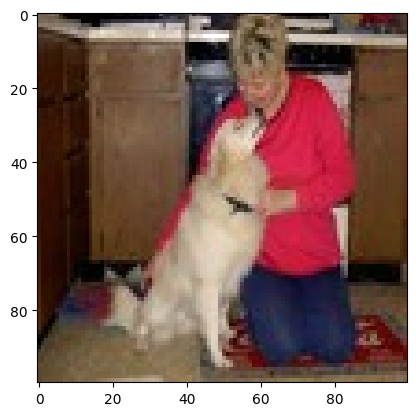

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

### Model

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')  # Use sigmoid since this is a binary classification
])

C:\Users\Soyab\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# # Alternative way of defining the same model
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.4986 - loss: 0.1003
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5175 - loss: 0.0153
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5049 - loss: 0.0145
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5048 - loss: 0.0141
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.4943 - loss: 0.0144


In [14]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7916 - loss: 0.0066


[0.014662684872746468, 0.5]